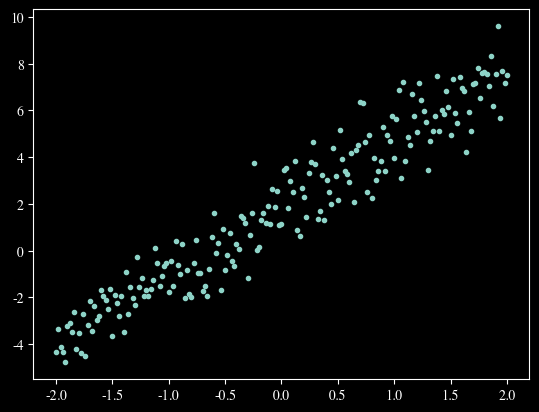

In [23]:
import tensorflow as tf
from matplotlib import pyplot as plt
# 设置matplotlib使用黑体显示中文
plt.rcParams['font.family'] = 'Times' # 设置字体

# 设定正确的权重和偏置 （一会想办法去把这两个参数去拟合出来)
TRUE_W = 3.0
TRUE_B = 2.0

# 指定数据数量
NUM_EXAMPLES = 201

x = tf.linspace(-2, 2, NUM_EXAMPLES)  # 生成-2到2之间的201个均匀分布的
x = tf.cast(x, tf.float32)  # 转换为float32类型

# 生成噪声数据
noise = tf.random.normal(shape=[NUM_EXAMPLES], mean=0.0, stddev=1.0)  # 添加噪声

# 定义一个函数
def f(x):
    return x * TRUE_W + TRUE_B

y = f(x) + noise  # 产生扰动后的y值
plt.plot(x, y, '.')  # 绘制数据点
plt.show()

In [24]:
class MyModel(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        # 初始化权重和偏置 实际之中应该是随机的
        self.w = tf.Variable(tf.random.normal(shape=[]))  # 标量权重
        self.b = tf.Variable(tf.random.normal(shape=[]))  # 标量偏置

    # 定义前向计算
    def __call__(self, x):
        return self.w * x + self.b

model = MyModel()
# 打印模型参数
print(f'模型参数:{model.variables}')

模型参数:(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.3121519>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.6350805>)


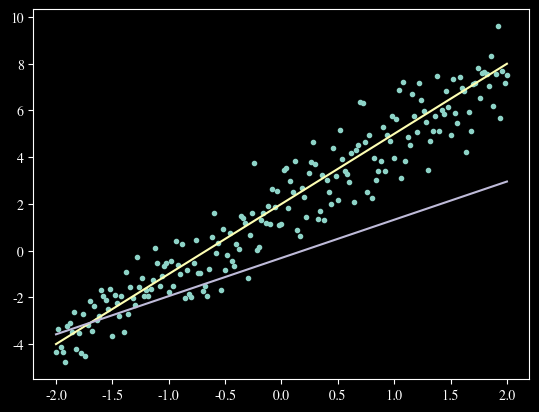

In [25]:
# 定义损失函数（均方误差）
def loss(y_true, y_pred):  # 参数是真实值和预测值 也可以叫做标签值和预测值（target_y,predicted_y）
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 被手动扰动过的值
plt.plot(x,y,".",label="数据")
# 真实值
plt.plot(x,f(x),label="真实值")
# 初始模型预测值
plt.plot(x,model(x),label="初始模型预测")
plt.show()

In [28]:
# 定义训练模型
def train(model, x, y, learning_rate):
    with tf.GradientTape() as tape:  # 自动求导
        y_pred = model(x)  # 预测值
        current_loss = loss(y, y_pred)  # 计算损失 y是被扰动过点(给的数据集) y_pred是预测值（模型结果）
    # 计算梯度
    dw, db = tape.gradient(current_loss, [model.w, model.b]) # 传入损失函数和模型参数计算梯度
    # 更新权重和偏置（减去按学习率缩放的梯度）
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [30]:
# 收集一下 w 和 b 的变化过程
Ws, Bs = [], []

# 定义学习轮数
epoches = range(20)

# 定义一个报告函数
def report(model, epoch, loss):
    Ws.append(model.w.numpy())
    Bs.append(model.b.numpy())
    print(f'轮数:{epoch+1:03d}, 损失:{loss:.3f}, 权重:{model.w.numpy():.3f}, 偏置:{model.b.numpy():.3f}')

In [31]:
# 开始训练循环
for epoch in epoches:
    current_loss = train(model, x, y, learning_rate=0.1)
    report(model, epoch, current_loss)

轮数:001, 损失:7.809, 权重:1.979, 偏置:0.118
轮数:002, 损失:5.119, 权重:2.231, 偏置:0.462
轮数:003, 损失:3.507, 权重:2.414, 偏置:0.737
轮数:004, 损失:2.533, 权重:2.548, 偏置:0.958
轮数:005, 损失:1.941, 权重:2.646, 偏置:1.134
轮数:006, 损失:1.578, 权重:2.718, 偏置:1.275
轮数:007, 损失:1.355, 权重:2.771, 偏置:1.387
轮数:008, 损失:1.217, 权重:2.809, 偏置:1.478
轮数:009, 损失:1.131, 权重:2.837, 偏置:1.550
轮数:010, 损失:1.077, 权重:2.857, 偏置:1.608
轮数:011, 损失:1.044, 权重:2.872, 偏置:1.654
轮数:012, 损失:1.023, 权重:2.883, 偏置:1.691
轮数:013, 损失:1.009, 权重:2.891, 偏置:1.720
轮数:014, 损失:1.001, 权重:2.897, 偏置:1.744
轮数:015, 损失:0.995, 权重:2.901, 偏置:1.763
轮数:016, 损失:0.992, 权重:2.904, 偏置:1.778
轮数:017, 损失:0.990, 权重:2.906, 偏置:1.790
轮数:018, 损失:0.989, 权重:2.908, 偏置:1.800
轮数:019, 损失:0.988, 权重:2.909, 偏置:1.807
轮数:020, 损失:0.987, 权重:2.910, 偏置:1.814


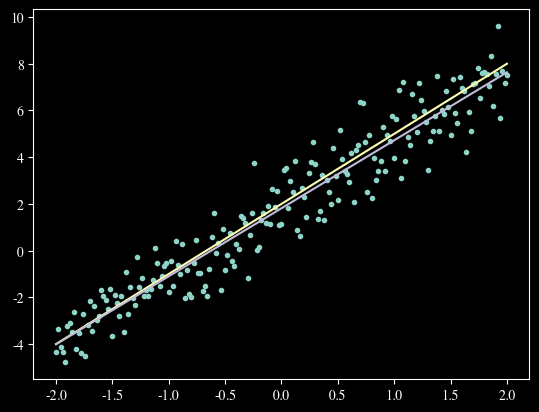

In [32]:
# 被手动扰动过的值
plt.plot(x,y,".",label="数据")
# 真实值
plt.plot(x,f(x),label="真实值")
# 初始模型预测值
plt.plot(x,model(x),label="初始模型预测")
plt.show() # 可以看到模型已经非常接近真实值了（通过被扰动的数据训练出来的）

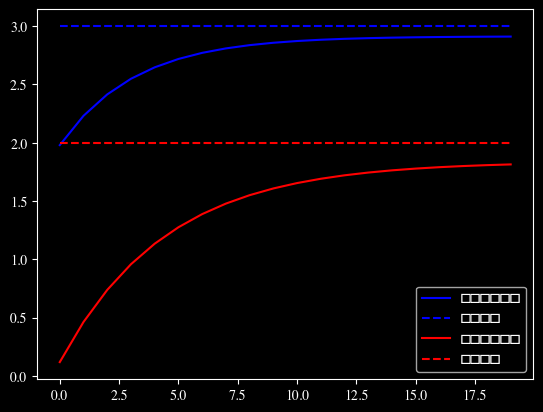

In [38]:
# 查看一下权重和偏置的变化过程
plt.plot(epoches, Ws, label='模型演变权重', color='blue')
plt.plot(epoches, [TRUE_W] * len(epoches), '--',
label="真实权重", color='blue')
plt.plot(epoches, Bs, label='模型演变偏置', color='red')
plt.plot(epoches, [TRUE_B] * len(epoches), "--",
label="真实偏置", color='red')
plt.legend()
plt.show()